In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### For the "Median value of owner-occupied homes" provide a __boxplot__

<AxesSubplot: xlabel='MEDV'>

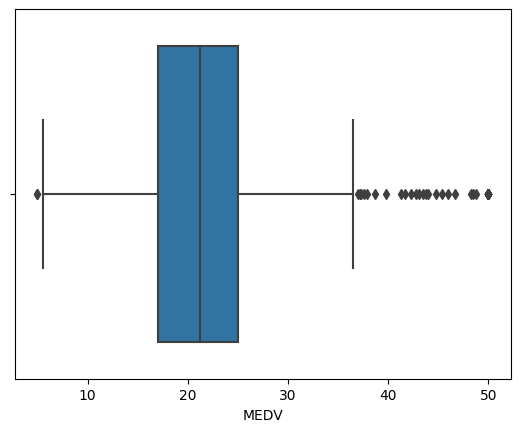

In [2]:
import seaborn as sns

o = sns.boxplot(x='MEDV', data=boston_df)
o

### Provide a  __bar plot__ for the Charles river variable

<AxesSubplot: xlabel='CHAS'>

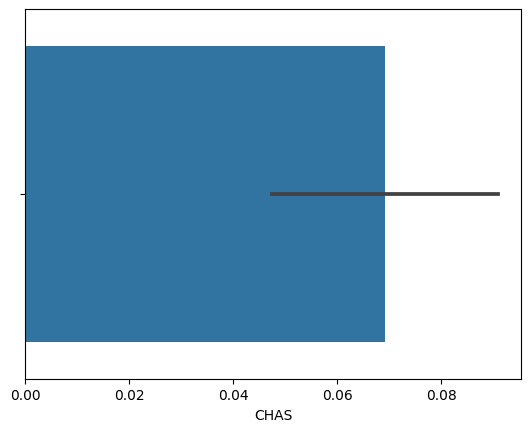

In [3]:
a = sns.barplot(x='CHAS', data=boston_df) 
a

### Provide a __boxplot__ for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<AxesSubplot: xlabel='MEDV', ylabel='AGED'>

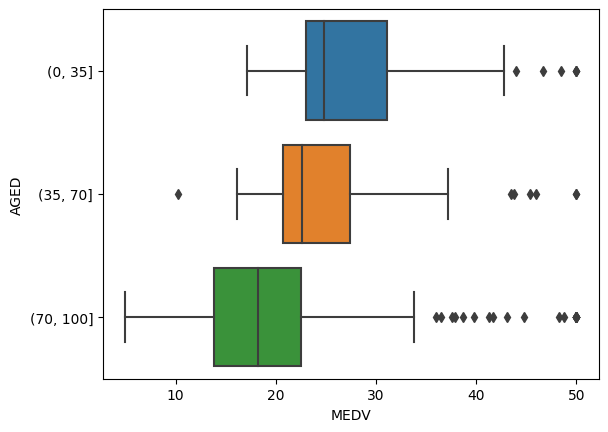

In [4]:
# boston_df['AGE'].max() = 100

boston_df['AGED']=pd.cut(x=boston_df['AGE'], bins=[0,35,70,100])
b=sns.boxplot(x='MEDV', y='AGED', data=boston_df)
b

### Provide a __scatter plot__ to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot: xlabel='INDUS', ylabel='NOX'>

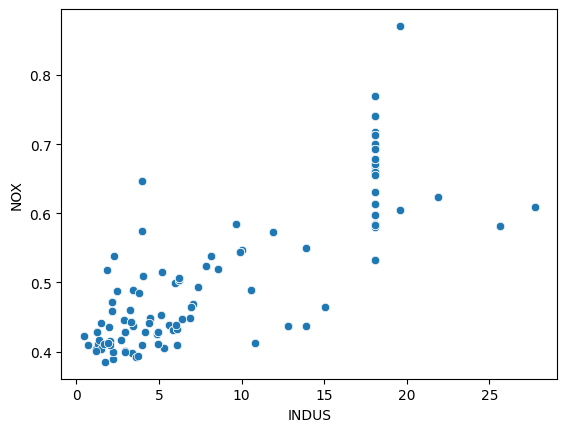

In [5]:
c=sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
c

The scatterplot seems to indicate that it's possible for this two variables to be correlated.

### Create a __histogram__ for the pupil to teacher ratio variable

C:\Users\raque\AppData\Local\Temp\ipykernel_1040\890321077.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  c1=sns.distplot(boston_df['PTRATIO'], bins=11, kde=True, color='blue')


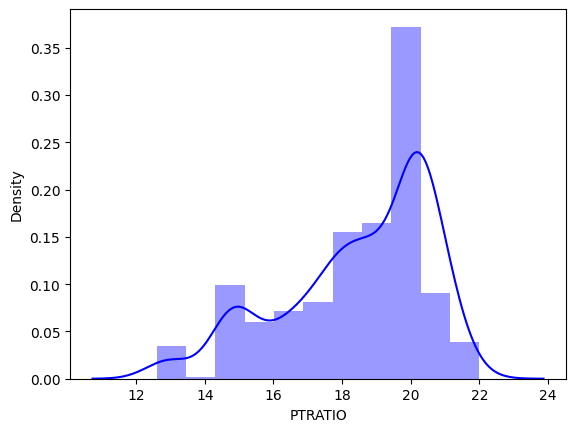

In [7]:
c1=sns.distplot(boston_df['PTRATIO'], bins=11, kde=True, color='blue')

### Is there a significant difference in median value of houses bounded by the Charles river or not?

[Text(0.5, 0, 'Bound by the river'), Text(0, 0.5, 'Median value of houses')]

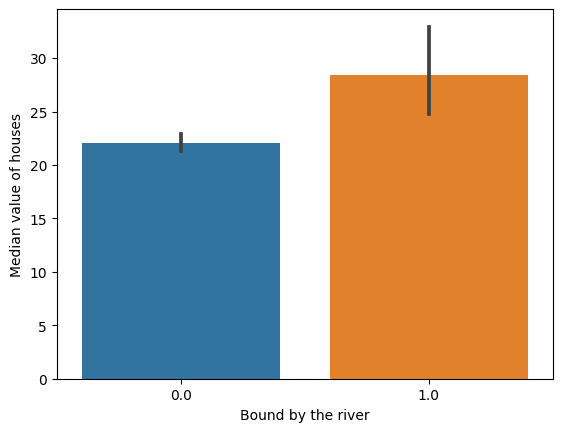

In [8]:
d = sns.barplot(x='CHAS', y='MEDV', data=boston_df) 
d.set(xlabel='Bound by the river', ylabel='Median value of houses')

In [9]:
!pip install scipy
import scipy

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is less than 0.05, variances are not equal

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

$H_0$: medians are equal for the bounded and not bounded.

In [10]:
# t-test for independent samples with unequal variances
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137516)

We can conclude that we reject the null hypothesis so the median value of the houses is significantly different between those bounded by the river and those who aren't bound.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

$H_0$: means of median values of houses in every proportion are equal.

In [11]:
median_age1 = boston_df[boston_df['AGED'] == pd.Interval(0, 35, closed='right') ]['MEDV']
median_age2 = boston_df[boston_df['AGED'] == pd.Interval(35, 70, closed='right') ]['MEDV']
median_age3 = boston_df[boston_df['AGED'] == pd.Interval(70, 100, closed='right') ]['MEDV']

a= scipy.stats.f_oneway(median_age1, median_age2, median_age3)
print(a)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022706873e-15)


There's a significative difference between median values of houses in each proportion of owner occupied units built before 1940, at least for one group respect to the others.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

$H_0$: There isn't correlation between the NOx concentrations and the proportion of non-retail business acres per town.

In [12]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209154, pvalue=7.913361061239591e-98)

No, since the p-value is less than 0.05 we reject the null hypothesis to affirm there's correlation between variables with an R of 0.763 (strong correlation).

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [24]:
##!pip install scikit-learn
#import numpy as np
#from sklearn.linear_model import LinearRegression
#
#X=np.array(boston_df['DIS']).reshape(-1, 1)
#y=np.array(boston_df['MEDV']).reshape(-1, 1)
#
#reg = LinearRegression().fit(X, y)
#
#print(f'R-squared {reg.score(X, y)}', f'intercept {reg.intercept_}', f'coefficient {reg.coef_}' )


R-squared 0.062464372121782574 intercept [18.39008833] coefficient [[1.09161302]] [47.31994975]


$H_0$ : There's no imapct of employment distance on median value.

In [15]:
import statsmodels.api as sm

X = boston_df['DIS']

y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        10:07:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We conclude that we reject the $H_0$ : There's no imapct of employment distance on median value. Because p-value is less than 0.05, there is an impact of employment distance on median value with a coefficient of 1.0916.

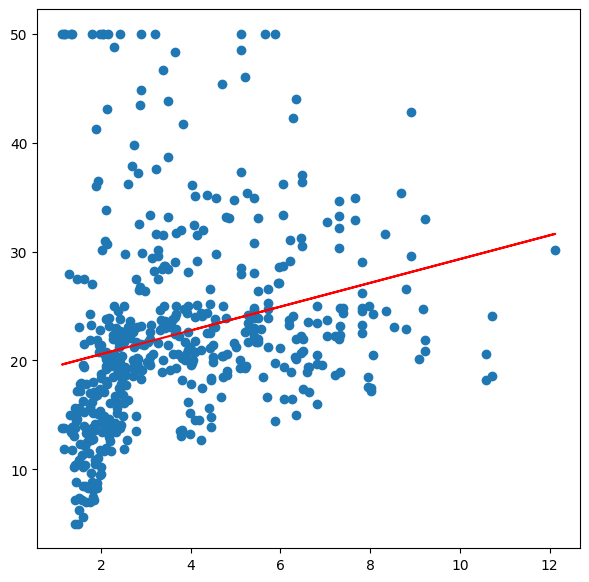

In [34]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(X, y, "o", label="Data")
ax.plot(X, model.fittedvalues, "r-", label="Predicted")